# **时间序列分析**
时间序列是按时间顺序排列的、随时间变化且相互关联的数据序列。对时间序列进行观察研究，找寻它的发展规律，预测它将来的走势就是时间序列分析。


# 分类
（1）移动平均法，根据项数的不同可分为一次移动平均，二次移动平均等。\
（2）指数平滑法，按照时间顺序对数据进行加权平均。\
（3）平稳时间序列和非平稳时间序列

# **移动平均法**
设观测序列为$y_1,y_2,\cdots ,y_T$,设移动平均的项数N< T,。一次移动平均值计算公式为：
$$M_t^{(1)}(N)=\dfrac{1}{N}(y_t+y_{t-1}+\cdots +y_{t-N+1})=\dfrac{1}{N} \sum_{i=0}^{N-1} y_{t-i}$$
则有
$$M_t^{(1)}(N)=M_{t-1}{(1)}(N)+\dfrac{1}{N} (y_t -y_{t-N})$$
t+1期的预测值为$\hat{y}_{t+1}=M_t^{(1)}(N)$,其预测标准误差为
$$S=\sqrt{\dfrac{\sum\limits_{t=N+1}^{T} (\hat{y}_t-y_t)^2}{T-N}}$$
\
如果将$\hat{y}_{t+1}$作为t+1期的实际值，那么就可以用$\hat{y}_{t+1}=M_t^{(1)}(N)$计算第t+2期预测值$\hat{y}_{t+2}$。一般地，也可相应地求得以后各期的预测值。但由于越远时期的预测，误差越大，因此一次移动平均法一般仅应用于一个时期后的预测值（即预测第t+1期）。


# <font color=violet>例<font>
<img src="image/18_1.png" width='600'>

In [ ]:
import numpy as np
y=np.array([423,358,434,445,527,429,426,502,480,384,427,446])
def MoveAverage(y,N):
    Mt=['*']*N #填补空位
    for i in range(N+1,len(y)+2):
        M=y[i-(N+1):i-1].mean() #求均值
        Mt.append(M)
    return Mt
yt3=MoveAverage(y,3) 
s3=np.sqrt(((y[3:]-yt3[3:-1])**2).mean()) #求标准差
yt5=MoveAverage(y,5)
s5=np.sqrt(((y[5:]-yt5[5:-1])**2).mean())
print('N=3时,预测值：',yt3,'，预测的标准误差：',s3)
print('N=5时,预测值：',yt5,'，预测的标准误差：',s5)

另一种写法

In [12]:
import numpy as np
y=np.array([423,358,434,445,527,429,426,502,480,384,427,446])
n1=3; 
yt1=np.convolve(np.ones(n1)/n1,y)[n1-1:-n1+1] #卷积，等量加权，去头尾
s1=np.sqrt(((y[n1:]-yt1[:-1])**2).mean())
n2=5; 
yt2=np.convolve(np.ones(n2)/n2,y)[n2-1:-n2+1]
s2=np.sqrt(((y[n2:]-yt2[:-1])**2).mean())
print('N=3时,预测值：',yt1,'，预测的标准误差：',s1)
print('N=5时,预测值：',yt2,'，预测的标准误差：',s2)

[141.         260.33333333 405.         412.33333333 468.66666667
 467.         460.66666667 452.33333333 469.33333333 455.33333333
 430.33333333 419.         291.         148.66666667]


# 二次移动平均法
当预测变量的基本趋势发生变化时，一次移动平均法不能迅速适应这种变化。当时间序列的变化为线性趋势时，一次移动平均法的滞后偏差使预测值偏低，不能进行合理的趋势外推。\
二次移动平均值计算公式为:
$$M_t^{(2)}=\dfrac{1}{N}(M_t^{(1)}+\cdots+M_{t-N+1}^{(1)})=M_{t-1}^{(2)}+\dfrac{1}{N}(M_t^{(1)}-M_{t-N}^{(1)})$$
当预测目标的基本趋势是在某一水平上下波动时，可用一次移动平均方法建立预测模型。当预测目标的基本趋势与某一线性模型相吻合时，常用二次移动平均法。但序列同时存在线性趋势与周期波动时，可用趋势移动平均法建立预测模型:
$$\hat{y}_{T+m}=a_T+b_T m, m=1,2, \cdots $$
其中$a_T=2M_T^{(1)}-M_T^{(2)},b_T=\dfrac{2}{N-1}(M_T^{(1)}-M_T^{(2)})$

# **指数平滑法**
一次移动平均实际上认为最近期数据对未来值影响相同，都加权，而期以前的数据对未来值没有影响，加权为0。但是，二次及更高次移动平均的权数却不是，且次数越高，权数的结构越复杂，但永远保持对称的权数，即两端项权数小，中间项权数大，不符合一般系统的动态性。一般说来历史数据对未来值的影响是随时间间隔的增长而递减的。所以，更切合实际的方法应是对各期观测值依时间顺序进行加权平均作为预测值。指数平滑法可满足这一要求，而且具有简单的递推形式。\
指数平滑法根据平滑次数的不同，又分为一次指数平滑法和二次指数平滑法等。指数平滑最适合用于简单的时间序列分析和中、短期预测。

# 一次指数平滑法
(1) **公式**\
设时间序列为$y_1,y_2,\cdots ,y_t,\cdots ,\alpha$为加权系数，$0<\alpha<1$,一次指数平滑的预测公式为：
$$\hat{y}_{t+1}=S_t^{(1)}=\alpha y_t+(1-\alpha)S_{t-1}^{(1)}=S_{t-1}^{(1)}+\alpha (y_t-S_{t-1}^{(1)})$$
将上式展开得：
$$S_T^{(1)}=\alpha y_t+(1-\alpha)[\alpha y_{t-1}+(1-\alpha)S_{t-2}^{(1)}]=\cdots=\alpha \sum_{j=1}^{\infty} (1-\alpha)^j y_{t-j}$$
各项系数和为1，并且加权系数符合指数规律，又具有平滑系数的功能，故称为指数平滑。

(2) **加权系数的选择**\
在进行指数平滑时，加权系数的选择是很重要的。$\alpha$的大小规定了在新预测值中新数据和原预测值所占的比重,$\alpha$值越大，新数据所占的比重就愈大，原预测值所占的比重就愈小，反之亦然。
$$\hat{y}_{t+1}=\hat{y}_t+\alpha(y_t-\hat{y}_t)$$
由上式不难看出，新预测值是根据预测误差对原预测值进行修正而得到的。$\alpha$的大小则体现了修正的幅度，$\alpha$值愈大，修正幅度愈大；$\alpha$值愈小，修正幅度也愈小。\
选择$\alpha$的值可以遵循以下规则：\
(i）如果时间序列波动不大，比较平稳，则$\alpha$应取小一点，如0.1～0.5，以减少修正幅度，使预测模型能包含较长时间序列的信息；\
(ii）如果时间序列具有迅速且明显的变动倾向，则$\alpha$应取大一点，如0.6～0.8，使预测模型灵敏度高一些，以便迅速跟上数据的变化。\
在实用上，类似移动平均法，多取几个值进行试算，看哪个预测误差小，就采用哪个。


(3) **初始值的确定**\
用一次指数平滑法进行预测，除了选择合适的$\alpha$外，还要确定初始值$S_0^{(1)}$。初始值是由预测者估计或指定的。当时间序列的数据较多，比如在20个以上时，初始值对以后的预测值影响很少，可选用第一期数据为初始值。如果时间序列的数据较少，在20个以下时，初始值对以后的预测值影响很大，这时，就必须认真研究如何正确确定初始值。一般以最初几期实际值的平均值作为初始值。

# <font color=violet> 例 <font>
<img src='image/18_2.png' width='600'>

In [20]:
import numpy as np
import pandas as pd
y=np.array([4.81,4.8,4.73,4.7,4.7,4.73,4.75,4.75,5.43,5.78,5.85])
def ExpMove(y,a): #计算前n项的预测值
    n=len(y); M=np.zeros(n); M[0]=(y[0]+y[1])/2
    for i in range(1,len(y)):
        M[i]=a*y[i-1]+(1-a)*M[i-1]
    return M
yt1=ExpMove(y,0.2); yt2=ExpMove(y,0.5)
yt3=ExpMove(y,0.8); s1=np.sqrt(((y-yt1)**2).mean())
s2=np.sqrt(((y-yt2)**2).mean())
s3=np.sqrt(((y-yt3)**2).mean())
d=pd.DataFrame(np.c_[yt1,yt2,yt3])
f=pd.ExcelWriter("Pdata18_2.xlsx")
d.to_excel(f); f.close()  #数据写入Excel文件，便于做表
print("预测的标准误差分别为：",s1,s2,s3)  #输出预测的标准误差

预测的标准误差分别为： 0.4148362642161784 0.32164247683489516 0.25883473030674825


In [7]:
yh=0.8*y[-1]+0.2*yt3[-1]
print("下一期的预测值为：",yh)

下一期的预测值为： 5.8165517935616


# 二次指数平滑法
一次指数平滑法虽然克服了移动平均法的缺点。但当时间序列的变动出现直线趋势时，用一次指数平滑法进行预测，仍存在明显的滞后偏差。因此，也必须加以修正。再作二次指数平滑，利用滞后偏差的规律建立直线趋势模型，这就是二次指数平滑法。其计算公式为：
$$
\begin{cases}
   S_t^{(1)}=\alpha y_t+(1-\alpha)S_{t-1}{(1)}\\
   S_t^{(2)}=\alpha S_t^{(1)}+(1-\alpha)S_{t-1}^{(2)}
\end{cases}$$

当时间序列从某时期开始具有直线趋势时，可用直线趋势模型
$$\hat{y}_{t+m}=a_t+b_t m, m=1,2,\cdots$$
$$
\begin{cases}
a_t=2S_t^{(1)}-S_t^{(2)}\\
b_t=\dfrac{\alpha}{1-\alpha}(S_t^{(1)}-S_t^{(2)})
\end{cases}
$$

# <font color=violet> 例 <font>
<img src='image/18_3.png' width='600'>

In [2]:
import numpy as np
import pandas as pd
y=np.loadtxt('Pdata18_3.txt')
n=len(y); alpha=0.3; yh=np.zeros(n)
s1=np.zeros(n); s2=np.zeros(n)
s1[0]=y[0]; s2[0]=y[0]
for i in range(1,n):
    s1[i]=alpha*y[i]+(1-alpha)*s1[i-1]
    s2[i]=alpha*s1[i]+(1-alpha)*s2[i-1]
    yh[i]=2*s1[i-1]-s2[i-1]+alpha/(1-alpha)*(s1[i-1]-s2[i-1])
at=2*s1[-1]-s2[-1]; bt=alpha/(1-alpha)*(s1[-1]-s2[-1]) #计算直线趋势方程的a和b
m=np.array([1,2])
yh2=at+bt*m
print("预测值为：",yh2)
d=pd.DataFrame(np.c_[s1,s2,yh])
f=pd.ExcelWriter("Pdata18_3.xlsx")
d.to_excel(f); f.close()


预测值为： [4171.88192538 4362.81543832]


# **三次指数平滑法**
当时间序列的变动表现为二次曲线趋势时，则需要用三次指数平滑法。三次指数平滑实在二次指数平滑的基础上，再进行一次外推，其计算公式为：
$$
\begin{cases}
    S_t^{(1)}=ay_t+(1-\alpha)S_{t-1}^{(1)}\\
    S_t^{(2)}=\alpha S_t^{(1)}+(1-\alpha)S_{t-1}^{(2)}\\
    S_t^{(3)}=\alpha S_t^{(2)}+(1-\alpha)S_{t-1}^{(3)}
\end{cases}
$$
\
其预测模型为：
$$\hat{y}_{t+T}=a_t+b_t T+c_t T^2$$
\
其中
$$
\begin{cases}
    a_t=3S_t^{(1)}-3S_t^(2)+S_t^{(3)}\\
    b_t=\dfrac{\alpha}{2(1-\alpha)^2}[(6-5\alpha)S_t^{(1)}+(4-3\alpha)S_t^{(3)}]\\
    c_t=\dfrac{\alpha^2}{2(1-\alpha)^2}[S_t^{(1)}-2S_t^{(2)}+S_t^{(3)}]
\end{cases}
$$

# **平稳时间序列分析**
协方差的定义：
$$\gamma_{t,s}=COV(X_t,X_s)=E[(X_t-\mu_t)(X_s-\mu_s)]$$
对于一个时间序列{X_t},如果它满足以下条件：\
（1）均值$E(X_t)=m$是与时间t无关的函数。\
（2）方差$Var(X_t)=s^2$是与时间t无关的函数。\
（3）协方差$COV(X_t,X_{t+k})$仅与间隔k有关，与时间t无关。\
那么该时间序列是平稳的。

# <font color=violet> 例 <font>
<img src='image/18_5_1.png' width='600'>

第一步：判断观测数据是否是平稳的

e:\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


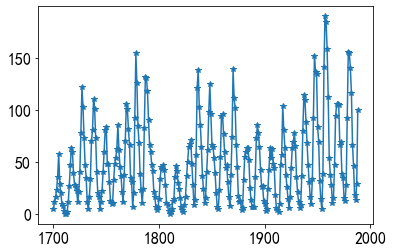

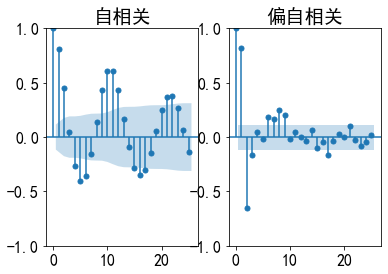

In [9]:
import pandas as pd, numpy as np
import statsmodels.api as sm
import matplotlib.pylab as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rc('axes',unicode_minus=False) #去掉坐标轴的负半轴
plt.rc('font',family='SimHei'); plt.rc('font',size=16)
d=pd.read_csv('sunspots.csv'); dd=d['counts']
years=d['year'].values.astype(int) #将数据类型转化为整数
plt.plot(years,dd.values,'-*'); plt.figure()

ax1=plt.subplot(1,2,1); plot_acf(dd,ax=ax1,title='自相关')
ax2=plt.subplot(1,2,2); plot_pacf(dd,ax=ax2,title='偏自相关') #拖尾和截尾
plt.show()

第二步：确定ARMA模型

In [7]:
for i in range(1,6):
    for j in range(1,6):
        md=sm.tsa.arima.ARIMA(dd,order=(i,0,j)).fit()
        print([i,j,md.aic,md.bic])

[1, 1, 2534.415297314419, 2549.081004066869]
[1, 2, 2486.3625230808702, 2504.6946565214325]
[1, 3, 2481.6469790642536, 2503.645539192928]
[1, 4, 2501.810774386794, 2527.475761203581]
[1, 5, 2478.462260497977, 2507.7936740028763]
[2, 1, 2451.537378487089, 2469.8695119276513]
[2, 2, 2452.4263853726743, 2474.4249455013487]
[2, 3, 2454.3953823270376, 2480.0603691438246]
[2, 4, 2436.7575597296245, 2466.088973234524]
[2, 5, 2435.3898029894717, 2468.3876431824838]
[3, 1, 2450.7986554381246, 2472.797215566799]
[3, 2, 2452.78657327174, 2478.451560088527]


e:\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
e:\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[3, 3, 2411.6547716915907, 2440.98618519649]
[3, 4, 2411.7421002585334, 2444.7399404515454]


e:\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[3, 5, 2408.4029713505433, 2445.0672382316675]
[4, 1, 2452.788049453489, 2478.453036270276]


e:\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
e:\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-i

[4, 2, 2451.50062562495, 2480.8320391298494]


e:\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[4, 3, 2451.6335361708016, 2484.6313763638136]
[4, 4, 2410.7025758765635, 2447.3668427576877]


e:\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[4, 5, 2410.2982396208217, 2450.6289331900584]
[5, 1, 2454.6752680482027, 2484.006681553102]


e:\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
e:\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-i

[5, 2, 2451.4100601238597, 2484.4079003168717]


e:\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[5, 3, 2453.38517185942, 2490.0494387405442]


e:\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[5, 4, 2411.0638774085537, 2451.3945709777904]
[5, 5, 2412.3092514332216, 2456.306371690571]


e:\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


第三步：计算结果并对残差进行分析

e:\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                 counts   No. Observations:                  289
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -1197.827
Date:                Fri, 05 Aug 2022   AIC                           2411.655
Time:                        18:30:23   BIC                           2440.986
Sample:                             0   HQIC                          2423.408
                                - 289                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.7960      7.852      6.342      0.000      34.407      65.185
ar.L1          2.5506      0.045     56.792      0.000       2.463       2.639
ar.L2         -2.4488      0.074    -33.196      0.0

e:\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


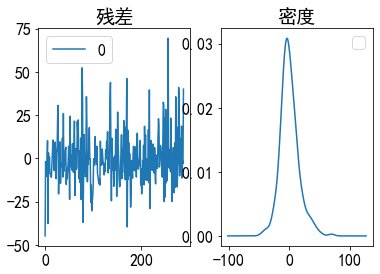

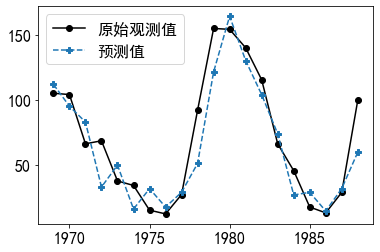

In [3]:
zmd=sm.tsa.arima.ARIMA(dd,order=(3,0,3)).fit()
print(zmd.summary())  #显示模型的所有信息
residuals = pd.DataFrame(zmd.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="残差", ax=ax[0])
residuals.plot(kind='kde', title='密度', ax=ax[1])
plt.legend(''); plt.ylabel('') 

dhat=zmd.predict(); plt.figure()
plt.plot(years[-20:],dd.values[-20:],'o-k')
plt.plot(years[-20:],dhat.values[-20:],'P--')
plt.legend(('原始观测值','预测值'))
dnext=zmd.predict(d.shape[0],d.shape[0])
print(dnext)  #显示下一期的预测值
plt.show()

# **非平稳时间序列分析**
差分运算：
$$\Delta^d X_t=\sum_{i=0}^d (-1)^i C_d^i X_{t-i}$$
在实践操作中，我们会根据序列不同的特点选择合适的差分方式，常见情况有以下三种：\
（1）序列蕴含着显著的线性趋势，一阶差分就可以实现平稳。\
（2）序列蕴含着曲线趋势，通常二阶或三阶差分就可以提取曲线趋势的影响。\
（3）对于蕴含着固定周期的序列进行步长为周期长度的差分运算，通常可以较好地提取周期信息。

# <font color=violet> 例 <font>
<img src='image/18_6.png' width='600'>

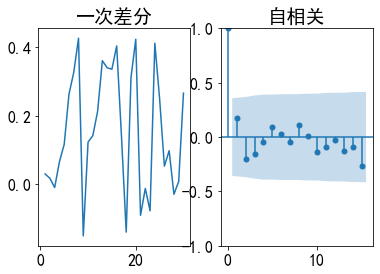

In [8]:
import pandas as pd, numpy as np
import statsmodels.api as sm
import matplotlib.pylab as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rc('axes',unicode_minus=False)
plt.rc('font',size=16); plt.rc('font',family='SimHei')
df=pd.read_csv('austa.csv')
plt.subplot(1,2,1); plt.plot(df.value.diff()) #差分
plt.title('一次差分')
ax2=plt.subplot(1,2,2)
plot_acf(df.value.diff().dropna(), ax=ax2,title='自相关') #dropna缺失值删除
plt.show()

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   31
Model:                 ARIMA(2, 1, 0)   Log Likelihood                   5.753
Date:                Fri, 05 Aug 2022   AIC                             -5.507
Time:                        18:31:32   BIC                             -1.303
Sample:                             0   HQIC                            -4.162
                                 - 31                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4963      0.196      2.532      0.011       0.112       0.880
ar.L2          0.0485      0.215      0.225      0.822      -0.373       0.470
sigma2         0.0395      0.012      3.193      0.0

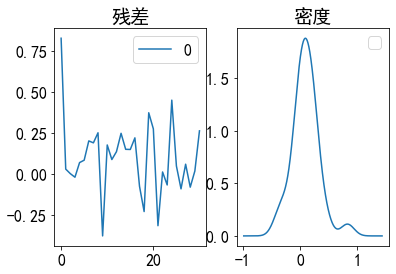

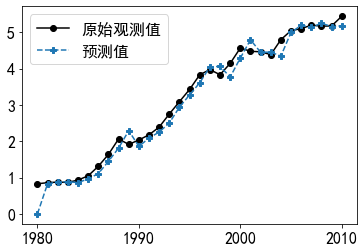

In [5]:
md=sm.tsa.arima.ARIMA(df.value, order=(2,1,0)).fit()
print(md.summary())


residuals = pd.DataFrame(md.resid) #计算残差
fig, ax = plt.subplots(1,2)
residuals.plot(title="残差", ax=ax[0])
residuals.plot(kind='kde', title='密度', ax=ax[1])
plt.legend(''); plt.ylabel('')          

zmd=md.predict()  #原始数据与预测值对比图
years=[0]
for i in range(0,31):
    years.append(i+1980)
plt.figure()
plt.plot(years[1:],df.value,'o-k')
plt.plot(years[1:],zmd,'P--')
plt.legend(('原始观测值','预测值'))
plt.show()